# Mount Drive with Colab

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras import layers

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications.vgg16 import VGG16

2024-07-12 21:14:18.126345: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 21:14:18.126454: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 21:14:18.300102: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.DataFrame(columns=['path', 'label'])
path_fire = r'/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/fire'
path_not_fire = r'/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire'

fire_data = []
not_fire_data = []

for dirname, _, filenames in os.walk(path_fire):
    for filename in filenames:
        fire_data.append([os.path.join(dirname, filename), 'fire'])

for dirname, _, filenames in os.walk(path_not_fire):
    for filename in filenames:
        not_fire_data.append([os.path.join(dirname, filename), 'non_fire'])

fire_df = pd.DataFrame(fire_data, columns=['path', 'label'])
not_fire_df = pd.DataFrame(not_fire_data, columns=['path', 'label'])

df = pd.concat([fire_df, not_fire_df]).sample(frac=1).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
# df.head(20)
df

,path,label
0,/kaggle/input/forest-fire-dataset/Forest Fire ...,non_fire
1,/kaggle/input/forest-fire-dataset/Forest Fire ...,non_fire
2,/kaggle/input/forest-fire-dataset/Forest Fire ...,non_fire
3,/kaggle/input/forest-fire-dataset/Forest Fire ...,fire
4,/kaggle/input/forest-fire-dataset/Forest Fire ...,fire
...,...,...
1515,/kaggle/input/forest-fire-dataset/Forest Fire ...,non_fire
1516,/kaggle/input/forest-fire-dataset/Forest Fire ...,non_fire
1517,/kaggle/input/forest-fire-dataset/Forest Fire ...,non_fire
1518,/kaggle/input/forest-fire-dataset/Forest Fire ...,non_fire


# Load Dataset

In [3]:
directory_link="/kaggle/input/forest-fire-dataset"
directory=os.listdir(directory_link)
print("Names of Directory :" , directory )
print("Number of Directory :" , len(directory))

Names of Directory : ['Forest Fire Dataset']
Number of Directory : 1


# Preprocessing and Feature Engineering

In [4]:
data='/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training'

In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="training",
  shuffle=True,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1520 files belonging to 2 classes.
Using 1216 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="validation",
  shuffle=True,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1520 files belonging to 2 classes.
Using 304 files for validation.


In [8]:
class_names = train_ds.class_names
print("Class:" , class_names)
print("No of Classes :" , len(class_names))

Class: ['fire', 'nofire']
No of Classes : 2


# Visulization

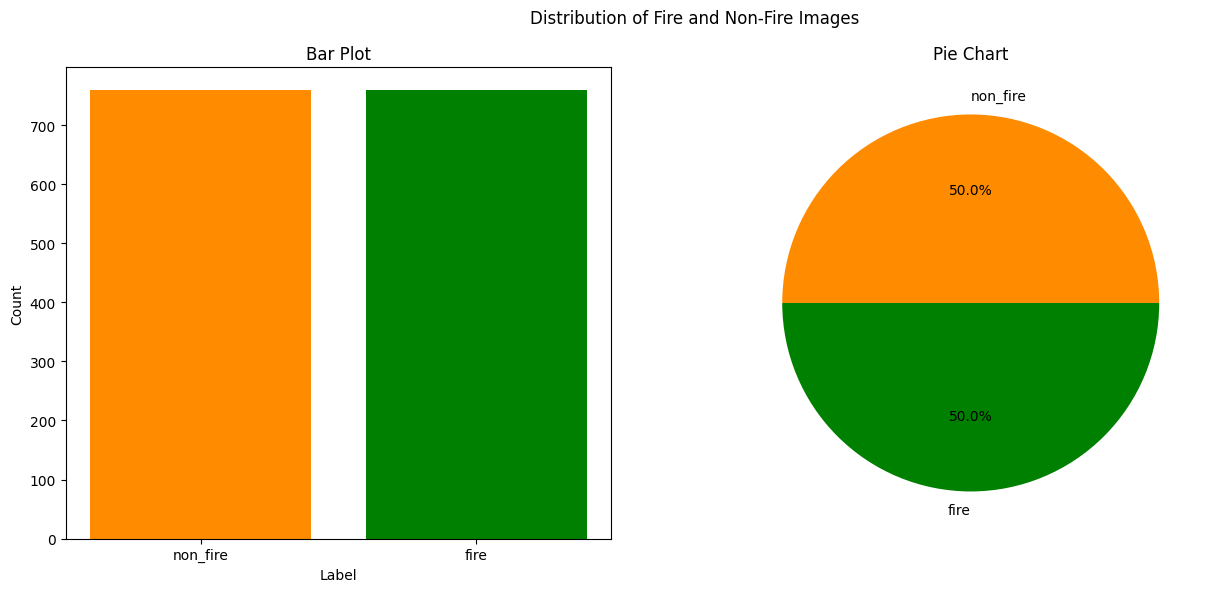

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sử dụng %matplotlib inline để hiển thị biểu đồ trong notebook
%matplotlib inline


# Đếm số lượng mỗi nhãn
label_counts = df['label'].value_counts()

# Tạo figure và gridspec
fig = plt.figure(figsize=(14, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.5])

# Tạo biểu đồ cột ở subplot 1
ax1 = fig.add_subplot(gs[0])
ax1.bar(label_counts.index, label_counts.values, color=['darkorange', 'green'])
ax1.set_title('Bar Plot')
ax1.set_xlabel('Label')
ax1.set_ylabel('Count')

# Tạo biểu đồ tròn ở subplot 2
ax2 = fig.add_subplot(gs[1])
ax2.pie(label_counts.values, labels=label_counts.index, colors=['darkorange', 'green'], autopct='%1.1f%%')
ax2.set_title('Pie Chart')

# Hiển thị biểu đồ
plt.suptitle('Distribution of Fire and Non-Fire Images')
plt.tight_layout()
plt.show()


In [10]:
from tensorflow.keras.preprocessing import image


label = 'fire' #label for images with fire
data = df[df['label'] == label]
sns.set_style('dark')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(8,10))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

NameError: name 'sns' is not defined

In [ ]:
label = 'non_fire' #label for images without fire
data = df[df['label'] == label]
sns.set_style('dark')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(8,10))
plt.suptitle('Images with non Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

In [ ]:
def shaper(row):
    shape = image.load_img(row['path']).size
    row['height'] = shape[1]
    row['width'] = shape[0]
    return row
df = df.apply(shaper,axis=1)
df

In [ ]:
sns.set_style('darkgrid')
fig,(ax1,ax2,ax3) = plt.subplots(1,3,gridspec_kw={'width_ratios': [3,0.5,0.5]},figsize=(15,10))
sns.kdeplot(data=df.drop(columns=['path','label']),ax=ax1,legend=True)
sns.boxplot(data=df,y='height',ax=ax2,color='skyblue')
sns.boxplot(data=df,y='width',ax=ax3,color='orange')
plt.suptitle('Distribution of image shapes')
ax3.set_ylim(0,7000)
ax2.set_ylim(0,7000)
plt.tight_layout()

### RGB Images

In [ ]:
plt.figure(figsize=(10, 10))
for images, label in train_ds.take(5):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")

### RGB Images Convert Into GrayScale

In [ ]:
plt.figure(figsize=(10, 10))
for images, label in train_ds.take(5):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    gray_image = tf.image.rgb_to_grayscale(images[i])

    plt.imshow(gray_image.numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")


### Normalize Images

In [ ]:
plt.figure(figsize=(10, 10))
for images, label in train_ds.take(5):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    gray_image = tf.image.rgb_to_grayscale(images[i])
    norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))

    plt.imshow(norm_image)
    plt.title(class_names[label[i]])
    plt.axis("off")

# Conv2D Network

Model Building

In [ ]:
num_classes = len(class_names)

model_conv2 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model_conv2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model_conv2.summary()

In [ ]:
epochs=10
history = model_conv2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

### Evaluation

In [ ]:
test_ds=model_conv2.evaluate(val_ds)


### Classification Report

In [ ]:
true_labels = []
predicted_labels = []
val_preds = model_conv2.predict(val_ds)

for images, labels in val_ds:
    true_labels.extend(labels.numpy())

predicted_labels = np.argmax(val_preds, axis=1)

report = classification_report(true_labels, predicted_labels, output_dict=True)

report_df = pd.DataFrame(report)

print(report_df)

### Create plots of the loss and accuracy on the training and validation sets

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

In [ ]:

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### ResNet50 Model

Build the Model

In [ ]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))
for layer in resnet_50.layers:
    layer.trainable = False

In [ ]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [ ]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

In [ ]:
# launch the training
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")

# Evaluation

In [ ]:
test_ds=model.evaluate(val_ds)

# Classification Report

In [ ]:
true_labels = []
predicted_labels = []
val_preds = model.predict(val_ds)

for images, labels in val_ds:
    true_labels.extend(labels.numpy())

predicted_labels = np.argmax(val_preds, axis=1)

report = classification_report(true_labels, predicted_labels, output_dict=True)

report_df = pd.DataFrame(report)

print(report_df)

### Create plots of the loss and accuracy on the training and validation sets

In [ ]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy of Resnet-50')

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss Resnet-50')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Dự đoán nhãn của dữ liệu validation
y_pred = model.predict(val_ds)
y_pred = np.round(y_pred)  # Chuyển đổi dự đoán thành nhãn nhị phân (0 hoặc 1)

# Lấy nhãn thực tế từ dữ liệu validation
y_true = []
for _, labels in val_ds:
    y_true.extend(labels.numpy())
y_true = np.array(y_true)

# Tính toán confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Vẽ biểu đồ confusion matrix bằng seaborn
labels = ['Negative', 'Positive']
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Cài đặt font scale cho bảng
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 12}, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.metrics import Recall,AUC
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
xception = Xception(include_top=False, input_shape=(180, 180, 3), weights='imagenet')
input_to_model = xception.input
#turn off training
xception.trainable = False

x = Flatten()(xception.output)
x = Dense(64,activation = 'relu')(x)
output_to_model = Dense(1,activation = 'sigmoid')(x)
model_xception = Model(inputs = input_to_model,outputs = output_to_model)

In [ ]:
model_xception.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy',Recall(),AUC()])

In [ ]:
history_xcept = model_xception.fit(x = train_ds,batch_size=32,epochs=10,validation_data = val_ds)

In [ ]:
test_ds=model_xception.evaluate(val_ds)

In [ ]:
true_labels = []
predicted_labels = []
val_preds = model_xception.predict(val_ds)

for images, labels in val_ds:
    true_labels.extend(labels.numpy())

predicted_labels = np.argmax(val_preds, axis=1)

report = classification_report(true_labels, predicted_labels, output_dict=True)

report_df = pd.DataFrame(report)

print(report_df)

In [ ]:
acc = history_xcept.history['accuracy']
val_acc = history_xcept.history['val_accuracy']

loss = history_xcept.history['loss']
val_loss = history_xcept.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy of Re')

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss Resnet-50')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Dự đoán nhãn của dữ liệu validation
y_pred = model_xception.predict(val_ds)
y_pred = np.round(y_pred)  # Chuyển đổi dự đoán thành nhãn nhị phân (0 hoặc 1)

# Lấy nhãn thực tế từ dữ liệu validation
y_true = []
for _, labels in val_ds:
    y_true.extend(labels.numpy())
y_true = np.array(y_true)

# Tính toán confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Vẽ biểu đồ confusion matrix bằng seaborn
labels = ['Negative', 'Positive']
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Cài đặt font scale cho bảng
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 12}, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
# Lưu mô hình
model_conv2.save('model_conv2.h5')